In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load and format the foursquare data
foursquare_data = pd.read_json("data/match.foursquare.json")
for k in foursquare_data["stats"].iloc[0].keys():
    foursquare_data[k] = [o[k] for o in foursquare_data["stats"]]
del foursquare_data["stats"]
del foursquare_data["base_name"]
for k in foursquare_data.columns:
    if k.startswith("yelp_"):
        continue
    foursquare_data["foursquare_" + k] = foursquare_data[k]
    del foursquare_data[k]

# Load and format the yelp data
yelp_data = pd.read_json("data/match.yelp.json")
yelp_data["price"] = yelp_data.price.map({"$": 1, "$$": 2, "$$$": 3, "$$$$": 4})
for k in yelp_data.columns:
    yelp_data["yelp_" + k] = yelp_data[k]
    del yelp_data[k]
    
# Read the meals data
meals_data = pd.read_csv("data/names.txt", sep="\t", names=["name", "meals"])
yelp_data = pd.merge(yelp_data, meals_data, left_on="yelp_base_name", right_on="name", how="left")

# Join the two datasets
joined = pd.merge(yelp_data, foursquare_data, on=("yelp_id", "yelp_name"), how="left")
joined = joined.groupby("yelp_id").first()
joined["foursquare_rating"] = joined["foursquare_rating"].fillna(0.0)

In [22]:
# Compute a simple combined score
x = np.array(joined.yelp_rating)
y = np.array(joined.foursquare_rating)
m = y > 0
A = np.vstack((x, y))
B, _, _ = np.linalg.svd(A, full_matrices=False)
joined["joint_rating"] = np.abs(np.dot(B[0], A))

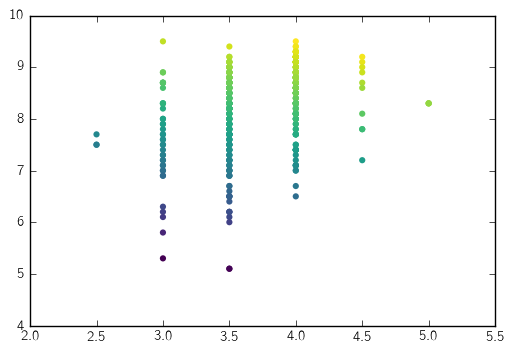

In [23]:
x = np.array(joined.yelp_rating)
y = np.array(joined.foursquare_rating)
z = np.array(joined.joint_rating)
m = y > 0
plt.scatter(x[m], y[m], c=z[m], edgecolor="none", cmap="viridis");

In [24]:
ordered = joined.sort_values("joint_rating")
ordered.tail(20)[["yelp_name", "yelp_rating", "foursquare_rating",
                  "foursquare_price", "yelp_price", "yelp_neighborhoods",
                  "yelp_categories", "meals"]]

,yelp_name,yelp_rating,foursquare_rating,foursquare_price,yelp_price,yelp_neighborhoods,yelp_categories,meals
yelp_id,,,,,,,,
french-louie-boerum-hill,French Louie,4.0,9.2,3.0,3.0,[Boerum Hill],[French],"Mon–Fri: Lunch, Dinner"
ai-fiori-new-york,Ai Fiori,4.0,9.2,4.0,4.0,[Midtown West],"[Italian, French, Seafood]",Mon-Fri Lunch
craft-new-york,Craft,4.0,9.2,4.0,4.0,[Flatiron],[American (New)],Mon-Fri Lunch
peter-luger-brooklyn-2,Peter Luger,4.0,9.2,4.0,4.0,"[South Williamsburg, Williamsburg - South Side]","[Steakhouses, Desserts, Seafood]","Mon–Fri: Lunch, Dinner | Sun: Brunch/Lunch..."
morimoto-new-york,Morimoto,4.0,9.2,4.0,4.0,"[Meatpacking District, Chelsea]","[Japanese, Sushi Bars]",Mon-Fri Lunch
felidia-new-york,Felidia,4.0,9.2,4.0,4.0,[Midtown East],[Italian],Mon-Fri Lunch
cafe-boulud-new-york-4,Cafe Boulud,4.0,9.2,4.0,4.0,[Upper East Side],[French],Mon-Fri Lunch
the-leopard-at-des-artistes-new-york,The Leopard at des Artistes,4.0,9.2,4.0,3.0,[Upper West Side],[Italian],"Mon-Fri Dinner | Sun: Brunch/Lunch, Dinner"
la-sirene-new-york,La Sirene,4.5,9.0,3.0,3.0,[South Village],[French],"Mon–Fri: Lunch, Dinner | Sun: Brunch/Lunch..."
